In [93]:
%matplotlib widget
import matplotlib.pyplot as plt
import importlib
import navier_stokes
importlib.reload(navier_stokes)
import numpy as np

height = 20
width = 20
grid = np.zeros(shape=(height,width))

simulator = navier_stokes.Simulator(grid)

for j in range(3, 12):
    for i in range(5,15):
        simulator.force_field[(j,i)] = [0.1, 0]


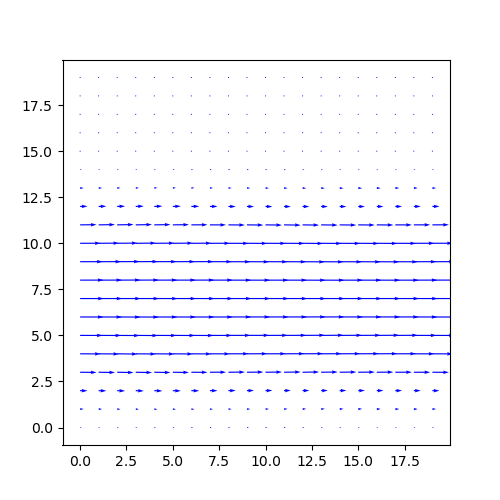

In [174]:

velocity_field = simulator.step(dt=1)
    
# Plotting junk
X, Y = np.meshgrid(np.arange(width), np.arange(height))
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(X, Y, velocity_field[:, :, 0], velocity_field[:, :, 1], color="b")
# Streamline
# dt = 80
# pos = np.array([15,9],dtype=np.float64)
# endpoint, steps = navier_stokes.trace(pos=pos, dt=dt, steps=10, velocity_field=velocity_field, savePath=True, dir=-1)
# xysteps = np.array([pos] + steps).T
# plt.plot(xysteps[0], xysteps[1], color="red", linewidth=1)
# for i, point in enumerate(steps):
#     plt.text(point[0], point[1] + 0.5, str(i), fontsize=7, ha='center', va='bottom')
#     plt.scatter(point[0], point[1], color='green', s=10)  # s sets the marker size
# plt.scatter(endpoint[0], endpoint[1], color='black', s=20)  # s sets the marker size

# # RK2
# endpoint = navier_stokes.rungeKutta2(pos, dt, vf=velocity_field)
# plt.plot([pos[0], endpoint[0]], [pos[1], endpoint[1]], color="magenta", linewidth=2)

plt.show()

In [66]:

vf = np.array([
    [[1,2], [2,4]],
    [[0,0], [1,-4]]
])

lengths = np.linalg.norm(vf, axis = 2)
nvf = vf/np.max(lengths)
print(nvf)
print(np.linalg.norm(nvf, axis=2))
# print(np.max(lengths))

[[[ 0.2236068   0.4472136 ]
  [ 0.4472136   0.89442719]]

 [[ 0.          0.        ]
  [ 0.2236068  -0.89442719]]]
[[0.5        1.        ]
 [0.         0.92195445]]
